# EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [5]:
df = pd.read_csv("../artifacts/train_set.csv")

In [6]:
# Cleaning headers and values
def clean_data(df):
    # Removing quotes and extra spaces from headers
    df.columns = [col.strip().replace('"', '') for col in df.columns]
    # Converting to numeric where possible, handling invalid entries
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [7]:
df = clean_data(df)

In [8]:
# 1. Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

Dataset Shape: (315, 3240)

First 5 Rows:
   ID     Feature_1  Feature_2     Feature_3  Feature_4  Feature_5  Feature_6  \
0 NaN  18281.541667    18432.0   9409.650391   0.514708   0.011300   0.045369   
1 NaN  20010.083333    20100.0   8303.049072   0.417707   0.014959   0.080294   
2 NaN  27260.125000    27437.0  12189.649414   0.447160   0.011428   0.046402   
3 NaN  41938.125000    42138.0  17866.433594   0.426019   0.009908   0.034878   
4 NaN  41274.125000    41439.0  14315.041992   0.346828   0.013596   0.065680   

   Feature_7  Feature_8  Feature_9  ...  Feature_3230  Feature_3231  \
0   2.803803   0.356658   1.803803  ...    382.968383        2214.0   
1   2.338398   0.429532   1.338398  ...    452.986164        2548.5   
2   2.782842   0.359345   1.782842  ...    419.781765        3400.0   
3   3.060655   0.326727   2.060655  ...    439.023968        5424.0   
4   2.478506   0.403469   1.478506  ...    485.209184        5096.0   

   Feature_3232  Feature_3233  Feature_3234 

### 1. Dataset Overview
- Shape: The dataset has 315 rows and 3,240 columns, indicating a wide dataset with many features.
- Data Types: 3,239 columns are float64, and 1 column (ID) is int64.
- Features 1712 to 1734 each have 116 missing values (out of 315 rows), which is about 36.8% missing data.
----

In [9]:
# 2. Summary Statistics
print("\nSummary Statistics for Numeric Features:")
numeric_stats = df.describe()
print(numeric_stats)


Summary Statistics for Numeric Features:
        ID      Feature_1      Feature_2     Feature_3   Feature_4  \
count  0.0     315.000000     315.000000    315.000000  315.000000   
mean   NaN   36401.611839   36558.978836  13421.797935    0.399783   
std    NaN   23979.228698   24006.711019   5229.346354    0.064272   
min    NaN    4601.166667    4646.000000   2420.351481    0.137726   
25%    NaN   23287.562500   23443.500000  10245.704590    0.357646   
50%    NaN   34818.166667   35028.000000  13894.792969    0.394076   
75%    NaN   45575.708333   45750.000000  16633.839844    0.434799   
max    NaN  332120.750000  332379.000000  45741.601562    0.643473   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  315.000000  315.000000  315.000000  315.000000  315.000000  ...   
mean     0.013326    0.066770    2.572654    0.395949    1.572654  ...   
std      0.002885    0.034442    0.305500    0.054492    0.305500  ...   
min      0.008904    0.028169  

### Summary Statistics
- **Feature_1 and Feature_2:** Means are 36,401 and 36,558, with standard deviations of 23,979 and 24,006, respectively. Max values are 332,120 and 332,379, indicating potential outliers (confirmed by 7 outliers each in `insights.txt`).
- **Feature_3:** Mean is 13,421, with a max of 45,741, showing a wide range.
- **Feature_4 to Feature_9:** These features have much smaller scales (means between 0.013 and 2.57), might a need for scaling.
- **Feature_2032:** Identified as a high-variance feature, with a mean of 1.0 and std of 0.0, which is unusual—likely a constant feature (all values are 1.0). This feature may not add value for modeling.
- **CLASS:** The target variable (binary, 0 or 1) has a mean of 0.394, indicating a slight class imbalance (about 39.4% positive class). This may require techniques like SMOTE or class weighting during modeling.
----

In [ ]:
# 3. Selecting a subset of features for detailed analysis (first 10 features + a few high-variance ones)
selected_features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5','Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10','Feature_2030', 'Feature_2031', 'Feature_2032'] 

Text(0.5, 1.0, 'Correlation Matrix of Selected Features')

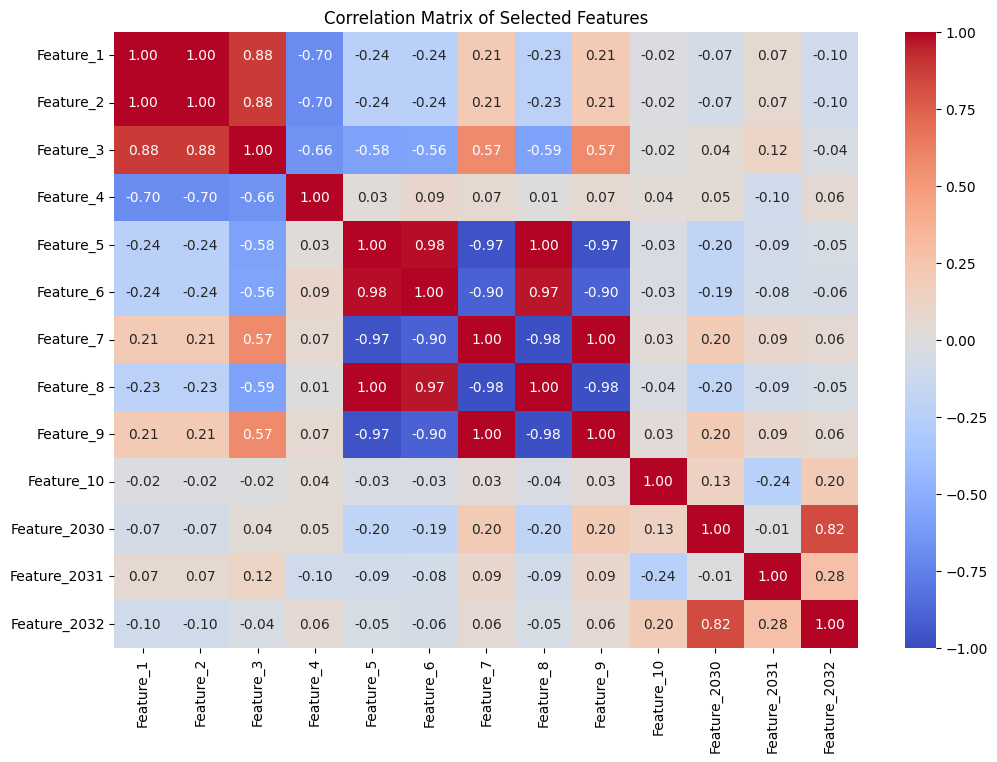

In [12]:
# 4. Correlation Analysis
plt.figure(figsize=(12, 8))
corr_matrix = df[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
# plt.savefig('correlation_matrix.png')
# plt.close()

### 4. High Correlations (|r| > 0.7)
- **Feature_1, Feature_2, Feature_3:**
    - Feature_1 and Feature_2 are perfectly correlated (r = 1.00), and both are highly correlated with Feature_3 (r = 0.88). This suggests redundancy.

- **Feature_5 to Feature_9:**
    - Extremely high correlations (e.g., Feature_5 and Feature_8 at r = 1.00, Feature_7 and Feature_9 at r = 1.00, others ranging from |0.90| to |0.98|). Many are also perfectly or near-perfectly negatively correlated (e.g., Feature_5 and Feature_7 at r = -0.97).
    - Action: Keep only one feature from this group and drop the others to avoid multicollinearity, which can destabilize models like linear regression.

- **Feature_2030 and Feature_2032:**
    - Correlation of 0.82. Since Feature_2032 is constant (std = 0), it’s likely not useful.
    - Action: Drop Feature_2032. Feature_2030 might still be useful if it’s not correlated with other features.
----

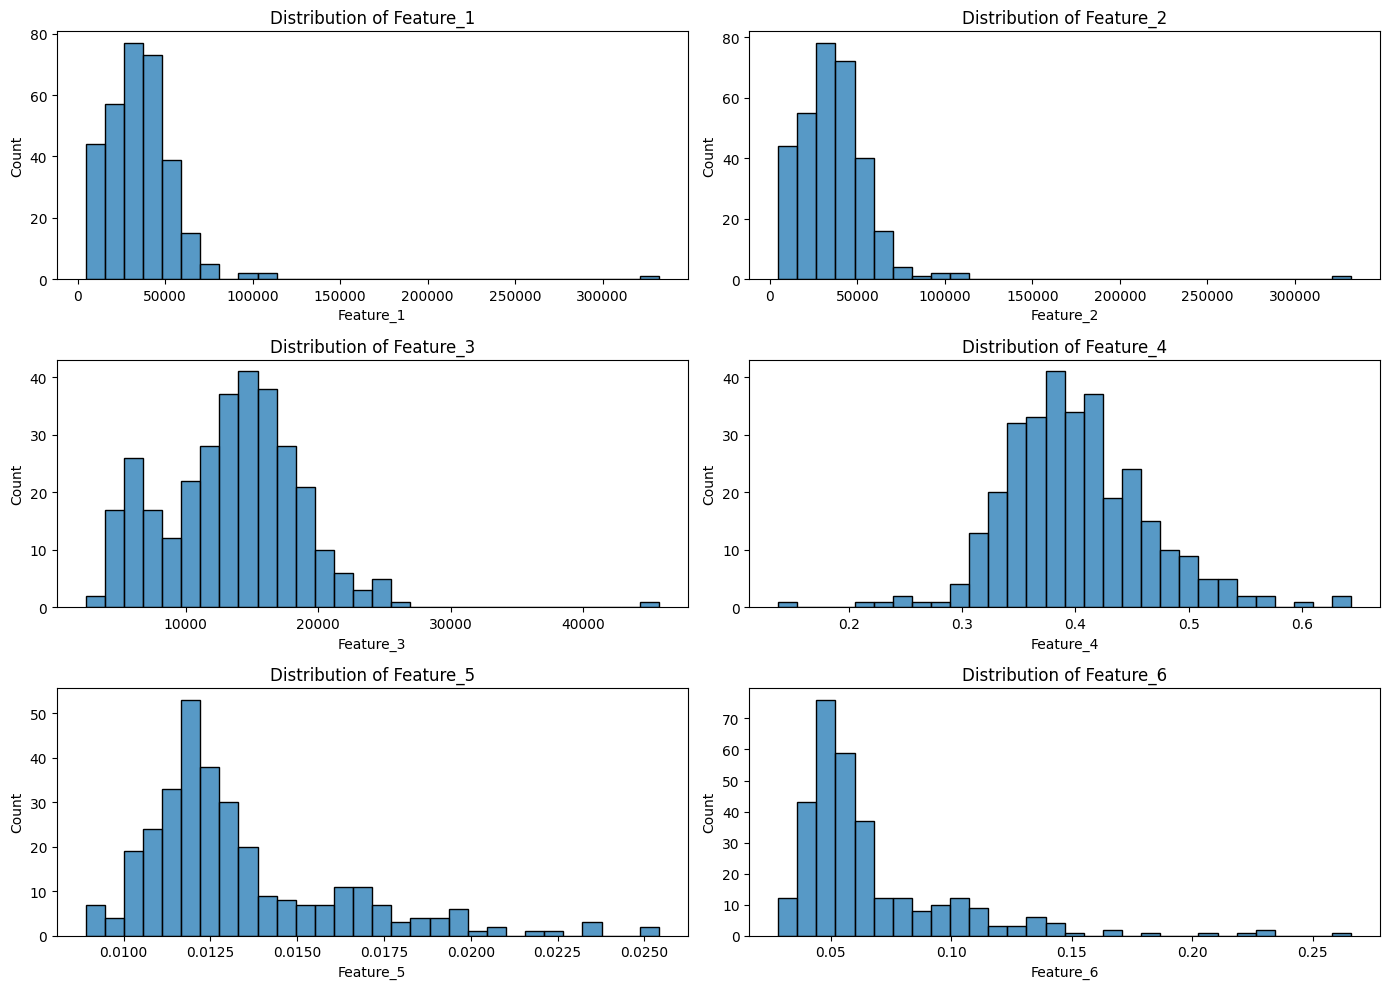

In [18]:
# 5. Distribution Plots for Selected Features
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()
for i, feature in enumerate(selected_features[:6]):  # Limiting to 6 for visualization
    sns.histplot(df[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.savefig('feature Distributions.png')
# plt.close()

### 5. Outliers
- **Feature_1 and Feature_2:** 7 outliers each, consistent with their high max values.
- **Feature_5 and Feature_6:** 24 and 30 outliers, respectively, indicating significant skewness or anomalies.
- **Feature_10:** 31 outliers, the highest among reported features.
-----

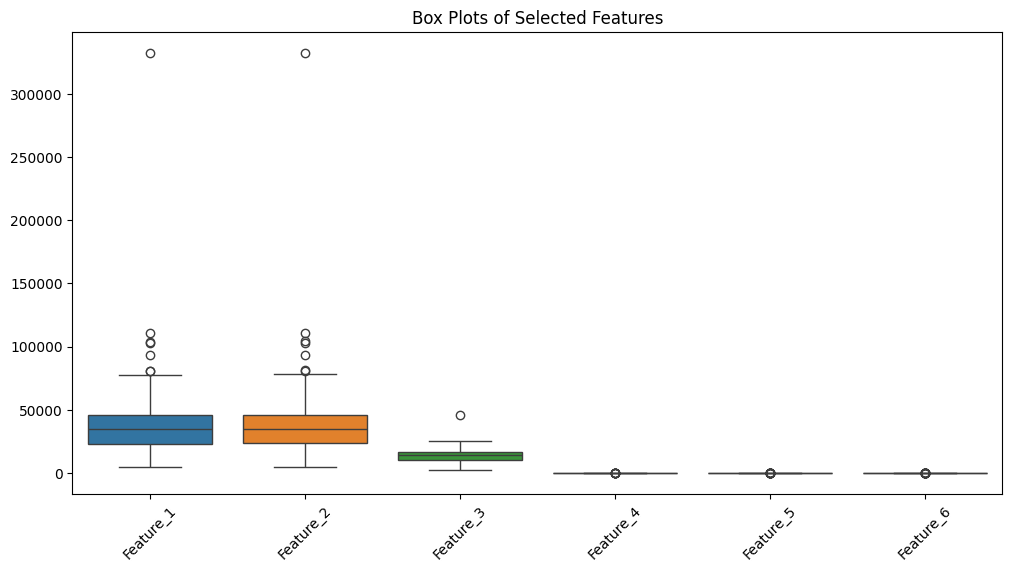

In [19]:
# 6. Box Plots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_features[:6]])
plt.xticks(rotation=45)
plt.title('Box Plots of Selected Features')
plt.savefig('box_plots.png')
# plt.close()

In [20]:
# 7. Insights Generation
def generate_insights(df, selected_features):
    insights = []
    
    # Missing Values Insight
    missing_cols = df[selected_features].isnull().sum()
    missing_cols = missing_cols[missing_cols > 0]
    if not missing_cols.empty:
        insights.append(f"Features with missing values: {', '.join(missing_cols.index)}")
    
    # High Correlation Insight
    high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], high_corr.iloc[i,j])
                       for i in range(high_corr.shape[0]) for j in range(high_corr.shape[1])
                       if abs(high_corr.iloc[i,j]) > 0.7]
    if high_corr_pairs:
        insights.append("High correlations (|r| > 0.7):")
        for pair in high_corr_pairs:
            insights.append(f"  - {pair[0]} and {pair[1]}: {pair[2]:.2f}")
    
    # Outlier Detection
    for feature in selected_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))][feature]
        if not outliers.empty:
            insights.append(f"Feature {feature} has {len(outliers)} outliers.")
    
    # High Variance Features
    variances = df[selected_features].var()
    high_var_features = variances[variances > variances.mean()].index
    insights.append(f"High variance features: {', '.join(high_var_features)}")
    
    return insights

In [21]:
insights = generate_insights(df, selected_features)
print("\nKey Insights:")
for insight in insights:
    print(f"- {insight}")


Key Insights:
- High correlations (|r| > 0.7):
-   - Feature_1 and Feature_2: 1.00
-   - Feature_1 and Feature_3: 0.88
-   - Feature_2 and Feature_3: 0.88
-   - Feature_5 and Feature_6: 0.98
-   - Feature_5 and Feature_7: -0.97
-   - Feature_5 and Feature_8: 1.00
-   - Feature_5 and Feature_9: -0.97
-   - Feature_6 and Feature_7: -0.90
-   - Feature_6 and Feature_8: 0.97
-   - Feature_6 and Feature_9: -0.90
-   - Feature_7 and Feature_8: -0.98
-   - Feature_7 and Feature_9: 1.00
-   - Feature_8 and Feature_9: -0.98
-   - Feature_2030 and Feature_2032: 0.82
- Feature Feature_1 has 7 outliers.
- Feature Feature_2 has 7 outliers.
- Feature Feature_3 has 1 outliers.
- Feature Feature_4 has 9 outliers.
- Feature Feature_5 has 24 outliers.
- Feature Feature_6 has 30 outliers.
- Feature Feature_7 has 5 outliers.
- Feature Feature_8 has 19 outliers.
- Feature Feature_9 has 5 outliers.
- Feature Feature_10 has 31 outliers.
- Feature Feature_2031 has 6 outliers.
- Feature Feature_2032 has 1 out

In [22]:
# 8. Saving the results
numeric_stats.to_csv('summary_statistics.csv')
with open('insights.txt', 'w') as f:
    f.write("\n".join(insights))